In [2]:
!pip install seaborn

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style('darkgrid')
%matplotlib inline

# Step 1: Load and Clean Data
# Step 2: Summary Statistics
# Step 3: Interesting Fact
# Step 4: Visualizations
# Step 5: Conclusion

In [5]:
# Load the CSV file (assuming styles.csv is in the same directory)
data_path = "/content/drive/MyDrive/CodeMonk_EDA_Task/styles.csv"
df = pd.read_csv(data_path, usecols=['id', 'baseColour', 'articleType', 'season', 'gender'])

In [7]:
df.head(10)

,id,gender,articleType,baseColour,season
0,15970,Men,Shirts,Navy Blue,Fall
1,39386,Men,Jeans,Blue,Summer
2,59263,Women,Watches,Silver,Winter
3,21379,Men,Track Pants,Black,Fall
4,53759,Men,Tshirts,Grey,Summer
5,1855,Men,Tshirts,Grey,Summer
6,30805,Men,Shirts,Green,Summer
7,26960,Women,Shirts,Purple,Summer
8,29114,Men,Socks,Navy Blue,Summer
9,30039,Men,Watches,Black,Winter


In [23]:
print("=== Dataset Info ===")
df.info()

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 44410 entries, 0 to 44445
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           44410 non-null  int64 
 1   gender       44410 non-null  object
 2   articleType  44410 non-null  object
 3   baseColour   44410 non-null  object
 4   season       44410 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [20]:
print("\n=== Numerical Columns Summary ===")
print(df.describe())


=== Numerical Columns Summary ===
                 id
count  44410.000000
mean   29700.873519
std    17044.678382
min     1163.000000
25%    14784.250000
50%    28614.500000
75%    44683.750000
max    60000.000000


In [21]:
print("\n=== Categorical Columns Summary ===")
print(df.describe(include='object'))


=== Categorical Columns Summary ===
       gender articleType baseColour  season
count   44410       44410      44410   44410
unique      5         143         46       4
top       Men     Tshirts      Black  Summer
freq    22146        7069       9728   21476


In [8]:
# Clean data: Remove rows with missing or invalid values
df = df.dropna(subset=['id', 'baseColour', 'articleType', 'season', 'gender'])
df = df[df['id'].apply(lambda x: str(x).isdigit())]  # Ensure 'id' is numeric
df['id'] = df['id'].astype(int)  # Convert id to integer
df = df[df['baseColour'].str.strip() != '']  # Remove empty strings
df = df[df['articleType'].str.strip() != '']
df = df[df['season'].str.strip() != '']
df = df[df['gender'].str.strip() != '']

In [9]:
print("=== Summary Statistics ===")
print(f"Total Records: {len(df)}")
print(f"Unique Genders: {df['gender'].nunique()} ({', '.join(df['gender'].unique())})")
print(f"Unique Seasons: {df['season'].nunique()} ({', '.join(df['season'].unique())})")
print(f"Unique Article Types: {df['articleType'].nunique()}")
print(f"Unique Base Colours: {df['baseColour'].nunique()}")

=== Summary Statistics ===
Total Records: 44410
Unique Genders: 5 (Men, Women, Boys, Girls, Unisex)
Unique Seasons: 4 (Fall, Summer, Winter, Spring)
Unique Article Types: 143
Unique Base Colours: 46


In [10]:
# Find the most popular color for each gender
most_popular_colour = df.groupby('gender')['baseColour'].value_counts().groupby(level=0).idxmax()
most_popular_colour_counts = df.groupby('gender')['baseColour'].value_counts().groupby(level=0).max()
print("\n=== Interesting Fact ===")
for gender, colour in most_popular_colour.items():
    count = most_popular_colour_counts[gender]
    print(f"Most popular color for {gender}: {colour[1]} ({count} items)")


=== Interesting Fact ===
Most popular color for Boys: Blue (159 items)
Most popular color for Girls: Pink (167 items)
Most popular color for Men: Black (5883 items)
Most popular color for Unisex: Black (772 items)
Most popular color for Women: Black (2949 items)


/tmp/ipython-input-11-4168459777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Blues')


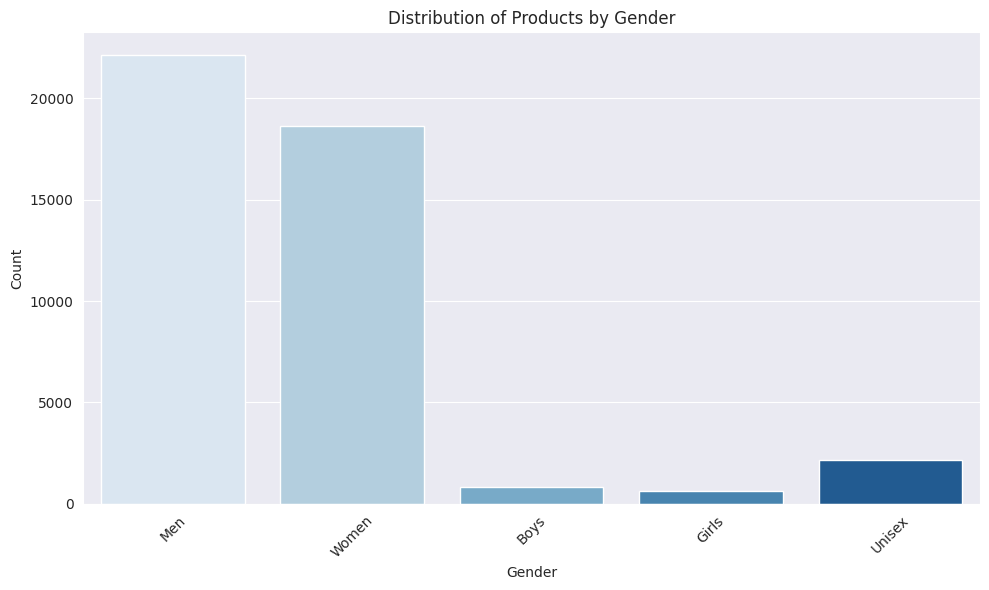

In [11]:
# Plot 1: Distribution by Gender (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', palette='Blues')
plt.title('Distribution of Products by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

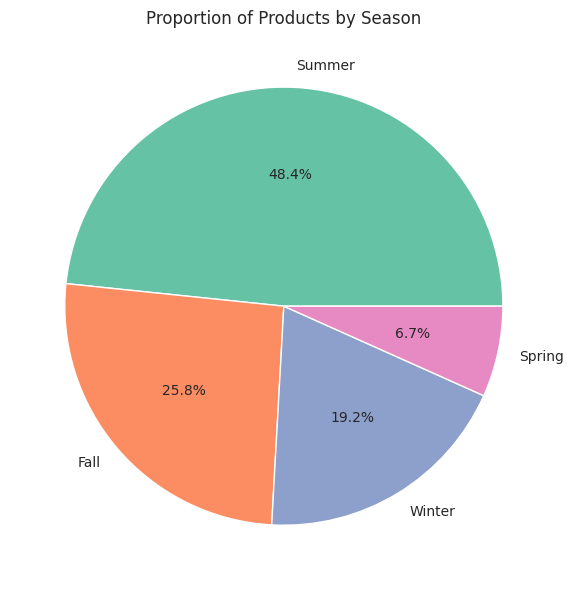

In [13]:
# Plot 2: Distribution by Season (Pie Chart)
season_counts = df['season'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(season_counts)))
plt.title('Proportion of Products by Season')
plt.tight_layout()
plt.show()

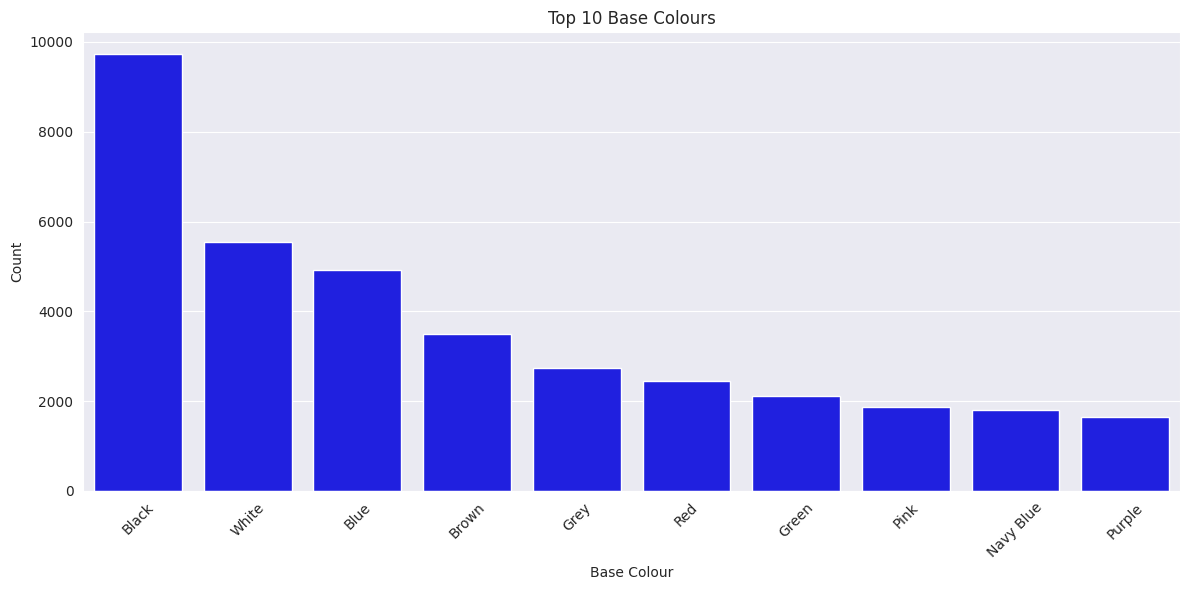

In [27]:
# Assuming df is your DataFrame and 'baseColour' is the column
# Get the top 10 colours and their counts
top_colours = df['baseColour'].value_counts().head(10)

# Plot the barplot with a single red color for all bars
plt.figure(figsize=(12, 6))
sns.barplot(x=top_colours.index, y=top_colours.values, color='blue')
plt.title('Top 10 Base Colours')
plt.xlabel('Base Colour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

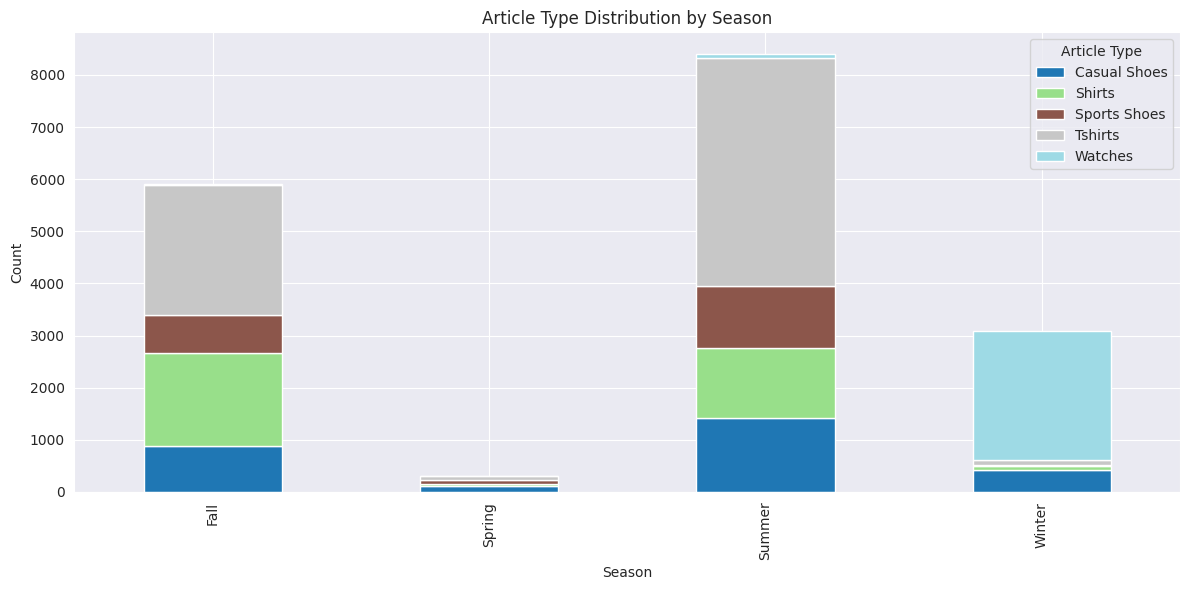

In [17]:
# Plot 4: Article Type by Season (Stacked Bar Chart)
top_article_types = df['articleType'].value_counts().head(5).index
filtered_df = df[df['articleType'].isin(top_article_types)]
pivot_table = filtered_df.pivot_table(index='season', columns='articleType', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Article Type Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Article Type')
plt.tight_layout()
plt.show()